# Exercise 5 - Gradient Descent and Logistic Regression

## Task 1 - Gradient Descent and Optimization 

### 1.1 Implement the linear regression cost function 

- Note the linear regression problem error/cost function (the function that is minimized to find the minimum argument). Use pen and paper.
- Implement a function cost_linear(X,y) returning the cost.

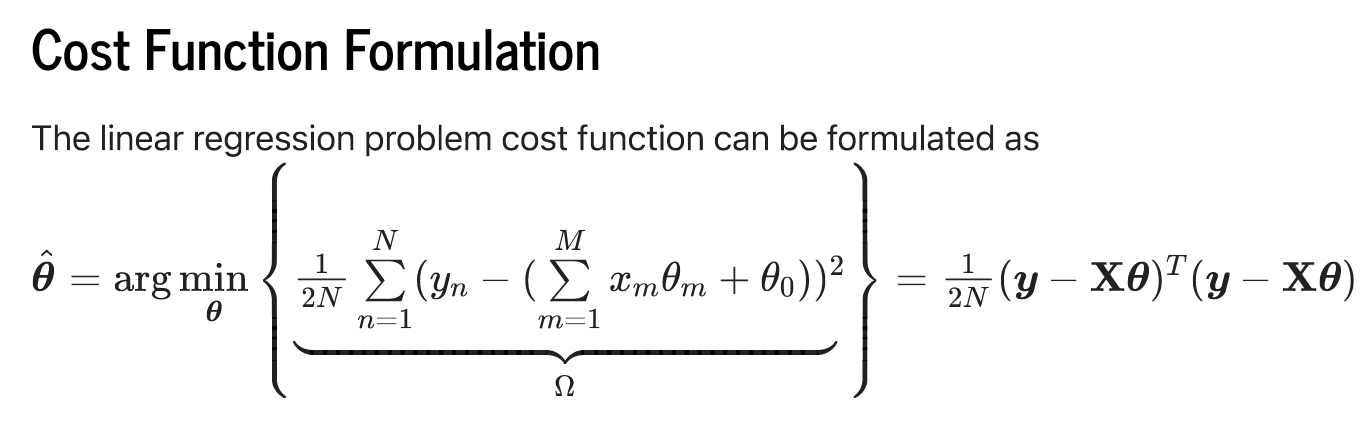

In [29]:
import numpy as np

def cost_linear(X, y, theta):
    N = np.shape(X)[0]
    rs = (y-np.dot(X, theta).T)
    return (1/(2*N))*np.dot(rs, rs.T)

### 1.2 Implement the gradient for the linear regression

- Begin by formulating each gradient vector entry separately, calculating the partial derivatives (Use pen and paper).
- Implement a function gradient_linear(X,y):

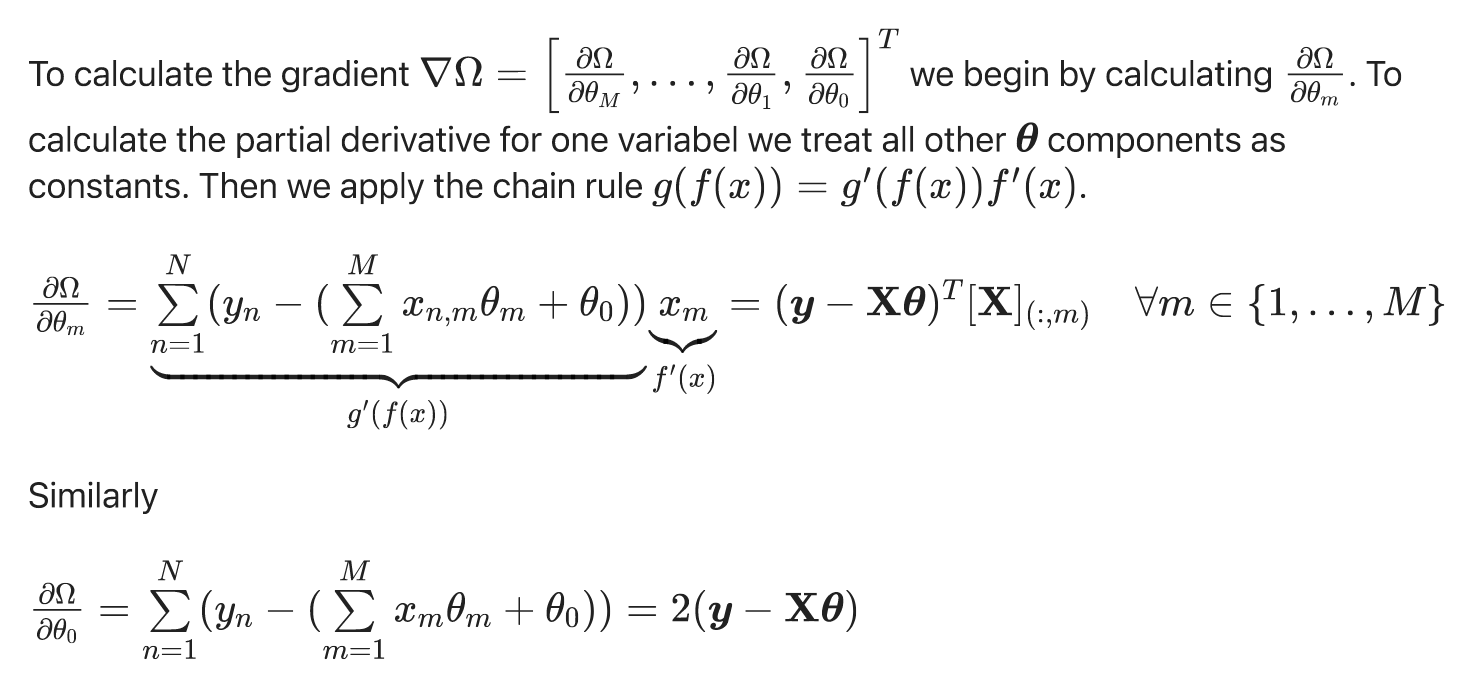

In [30]:
def gradient_linear(X, y, theta):
    N = len(y)
    prediction = np.dot(X, np.asarray(theta).reshape(2,1))
    y = y.reshape(N,1)
    gradient = (1/N) * np.dot(X.T, prediction - y)
    return gradient

## Task 2 - Challenger Dataset


### 2.1 Load the challenger dataset into a pandas dataframe

In [31]:
import pandas as pd
df = pd.read_csv('./o-ring-erosion-only.csv',sep='\s+')
#'\s+' means till next number
df.head()

,o-ring_num_flight,o-ring_num_thermal_stress,launch_temperature,leak-check_pressure,temporal_order
0,6,0,66,50,1
1,6,1,70,50,2
2,6,0,69,50,3
3,6,0,68,50,4
4,6,0,67,50,5


### 2.2 Plot the "o-ring_num_thermal_stress" versus "launch_temperature"

Text(0, 0.5, 'Thermal stress')

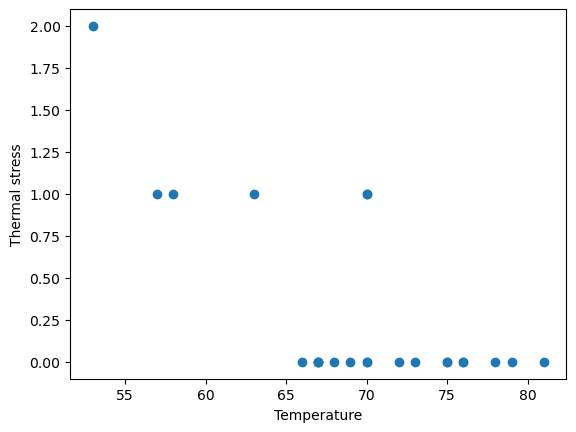

In [32]:
import matplotlib.pyplot as plt

plt.scatter( x = df['launch_temperature'] ,y = df['o-ring_num_thermal_stress'] )
plt.xlabel('Temperature')
plt.ylabel('Thermal stress')

### 2.3 Insert a new table column for the binary class "failure_launch" filled with 0 for succes and 1 for flawed launches (wrt # o-rings under thermal stress)

In [33]:
df['failure_launch'] = df['o-ring_num_thermal_stress']
df['failure_launch'][df['failure_launch']>0]=1.0
df=df.sort_values(by='launch_temperature')
df.head()

,o-ring_num_flight,o-ring_num_thermal_stress,launch_temperature,leak-check_pressure,temporal_order,failure_launch
13,6,2,53,200,14,1
8,6,1,57,200,9,1
22,6,1,58,200,23,1
9,6,1,63,200,10,1
0,6,0,66,50,1,0


### 2.4 Fit a logistic regression model 

In [34]:
from sklearn.linear_model import LogisticRegression
from scipy.special import expit

X = df['launch_temperature'].values
X = X.reshape(-1, 1)
y = df['failure_launch']
clf= LogisticRegression(random_state=0).fit(X,y)

### 2.5 Predict the "failure_launch"- class for the predicted challenger launch temperature 26 [F]

In [35]:
X_test = np.array([26])
X_test=X_test.reshape(1,-1)
phat=clf.predict(X_test)
if (phat > 0.5):
    yhat = 1
else:
    yhat =0

### 2.6 Plot the logistic regression model and the failure classes

Text(0, 0.5, 'Failure probability')

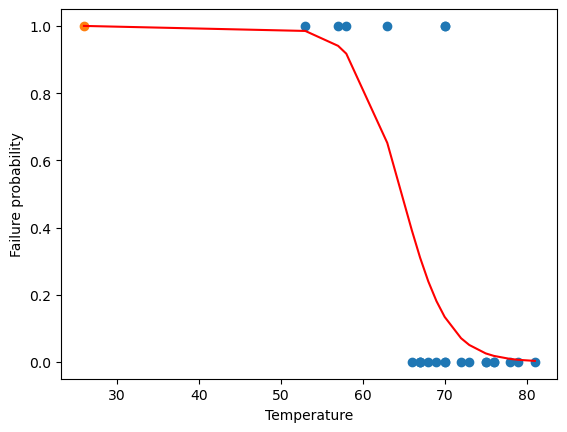

In [36]:
X_new=np.concatenate((X_test,X))
loss=expit(X_new*clf.coef_+clf.intercept_).ravel()
plt.plot(X_new,loss,label="Logistic Regression Model",color="red")
plt.scatter(X,df['failure_launch'].values)
plt.scatter(X_test,1)
plt.xlabel('Temperature')
plt.ylabel('Failure probability')